In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [ ]:
train_dir='/content/drive/MyDrive/outputimg/train'
test_dir='/content/drive/MyDrive/outputimg/val'

In [ ]:
img_width, img_height= 224,224

In [ ]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 10, activation = 'softmax'))
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11944064  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)


In [ ]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1513 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 506 images belonging to 10 classes.


In [ ]:
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/25
 1/48 [..............................] - ETA: 11:16 - loss: 2.3025 - accuracy: 0.0625

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


48/48 [==============================] - 318s 6s/step - loss: 7.0103 - accuracy: 0.1468 - val_loss: 1.4098 - val_accuracy: 0.4269
Epoch 2/25
48/48 [==============================] - 41s 851ms/step - loss: 1.3493 - accuracy: 0.4689 - val_loss: 1.1080 - val_accuracy: 0.5711
Epoch 3/25
48/48 [==============================] - 40s 844ms/step - loss: 0.8857 - accuracy: 0.6359 - val_loss: 0.5998 - val_accuracy: 0.7451
Epoch 4/25
48/48 [==============================] - 41s 847ms/step - loss: 0.5907 - accuracy: 0.8013 - val_loss: 0.5509 - val_accuracy: 0.7767
Epoch 5/25
48/48 [==============================] - 41s 846ms/step - loss: 0.4760 - accuracy: 0.8124 - val_loss: 0.5850 - val_accuracy: 0.8202
Epoch 6/25
48/48 [==============================] - 41s 846ms/step - loss: 0.4319 - accuracy: 0.8457 - val_loss: 0.5360 - val_accuracy: 0.7885
Epoch 7/25
48/48 [==============================] - 41s 846ms/step - loss: 0.3210 - accuracy: 0.8738 - val_loss: 0.2904 - val_accuracy: 0.9289
Epoch 8/25
4

In [ ]:
r.history

{'accuracy': [0.24322538077831268,
  0.509583592414856,
  0.6569728851318359,
  0.7984137535095215,
  0.8162590861320496,
  0.8578982353210449,
  0.8869795203208923,
  0.8962326645851135,
  0.920026421546936,
  0.9319233298301697,
  0.9464640021324158,
  0.9101123809814453,
  0.9279577136039734,
  0.9458030462265015,
  0.9550561904907227,
  0.9596827626228333,
  0.9629874229431152,
  0.9623265266418457,
  0.9583608508110046,
  0.9643093347549438,
  0.9543952345848083,
  0.959021806716919,
  0.9491077065467834,
  0.9497686624526978,
  0.9596827626228333],
 'loss': [3.6010842323303223,
  1.2309564352035522,
  0.8365401029586792,
  0.5874810218811035,
  0.4516291618347168,
  0.3901420831680298,
  0.2948070764541626,
  0.2907758355140686,
  0.23825404047966003,
  0.1960439532995224,
  0.15348218381404877,
  0.23694702982902527,
  0.18677526712417603,
  0.1481330394744873,
  0.13792920112609863,
  0.11867030709981918,
  0.09876662492752075,
  0.1050749123096466,
  0.10390432924032211,
  0.1

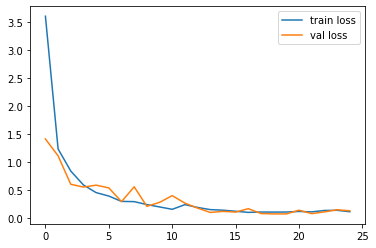

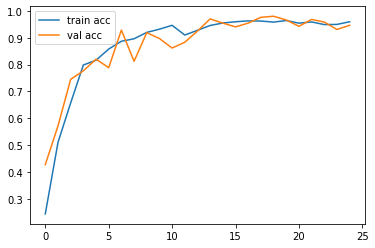

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

Classifier.save('model_Classifier1.h5')

In [ ]:
y_pred = Classifier.predict(test_set)

In [ ]:
y_pred

array([[1.95006432e-04, 1.66011731e-07, 6.93830771e-08, ...,
        8.37342975e-15, 9.97453749e-01, 9.61174432e-04],
       [2.40546768e-07, 9.74119119e-10, 1.81884900e-06, ...,
        1.75965700e-10, 5.05877542e-04, 1.52312305e-05],
       [1.00000000e+00, 3.36091510e-08, 6.13371914e-29, ...,
        1.03663058e-24, 1.21155624e-23, 6.72460629e-22],
       ...,
       [2.41305413e-12, 7.14157610e-21, 9.99898791e-01, ...,
        1.23227384e-21, 1.52651587e-13, 7.80645554e-14],
       [1.22486044e-05, 9.99131942e-08, 5.96110749e-06, ...,
        4.43872317e-08, 2.27685105e-05, 2.45468909e-05],
       [3.44096918e-07, 8.35578203e-16, 1.56252995e-07, ...,
        2.58900615e-22, 9.04140096e-10, 8.97825477e-12]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([8, 4, 0, 3, 4, 3, 2, 8, 2, 4, 0, 5, 5, 0, 5, 6, 0, 4, 5, 5, 2, 7,
       5, 0, 9, 4, 5, 7, 6, 5, 5, 6, 4, 0, 3, 7, 7, 1, 2, 9, 9, 0, 4, 5,
       5, 2, 3, 4, 7, 9, 6, 2, 5, 5, 2, 4, 2, 8, 0, 0, 8, 0, 2, 4, 5, 5,
       5, 5, 4, 2, 0, 6, 2, 3, 2, 5, 3, 8, 6, 0, 0, 0, 5, 2, 5, 2, 2, 7,
       8, 8, 5, 3, 4, 4, 4, 4, 4, 2, 2, 0, 3, 0, 6, 3, 5, 5, 2, 3, 0, 9,
       5, 5, 6, 3, 6, 2, 9, 6, 7, 4, 6, 2, 5, 4, 0, 3, 0, 3, 8, 2, 9, 9,
       4, 2, 6, 5, 0, 2, 1, 3, 3, 2, 2, 1, 6, 2, 0, 4, 5, 4, 3, 9, 8, 2,
       9, 2, 0, 4, 0, 3, 3, 4, 0, 7, 3, 7, 5, 2, 2, 4, 5, 4, 3, 2, 2, 4,
       1, 5, 5, 9, 8, 2, 9, 7, 8, 6, 2, 5, 2, 3, 0, 3, 2, 0, 5, 4, 4, 8,
       4, 2, 2, 9, 5, 9, 8, 5, 3, 6, 5, 1, 2, 5, 5, 8, 0, 9, 0, 2, 3, 8,
       3, 3, 9, 8, 4, 2, 7, 3, 0, 5, 3, 4, 3, 5, 2, 3, 3, 2, 3, 3, 5, 2,
       9, 9, 7, 2, 6, 8, 4, 4, 5, 0, 2, 4, 8, 4, 5, 4, 3, 7, 8, 2, 6, 3,
       4, 3, 3, 0, 0, 0, 3, 4, 2, 3, 6, 3, 0, 6, 0, 0, 5, 3, 0, 3, 8, 2,
       5, 5, 6, 3, 3, 2, 0, 3, 0, 2, 2, 5, 9, 0, 4,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_Classifier1.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/testdata/10_old_Fake/3.jpg',target_size=(224,224))

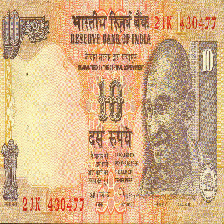

In [ ]:
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [ ]:
result = Classifier.predict(test_image)
result

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(test_image), axis=1)

In [ ]:
for i in a:
  print(i)



2


In [ ]:
if i == 0:
  print ('It is an old 100 rupees fake note')
elif i==1:
  print('It is an old 100 rupees real note')
elif i==2:
  print('It is an old 10 rupees fake note')
elif i==3:
  print('It is an old 10 rupees real note')
elif i==4:
  print('It is an old 20 rupees fake note')
elif i==5:
  print('It is an old 20 rupees real note')
elif i==6:
  print('It is a new 50 rupees fake note')
elif i==7:
  print('It is a new 50 rupees real note')
elif i==8:
  print('It is an old 50 rupees fake note')
elif i==9:
  print('It is an old 50 rupees real note')

It is an old 10 rupees fake note
